In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps

c = Census('85ac64b6b5a9c0901b00329d1ef41f0c53ccfc98', year=2017)

offenses = pd.read_csv('atx_offenses_zip_2009-2018.csv')
crime_rate = pd.read_csv('atx_crime_rates_2009-2018.csv')
zillow = pd.read_csv('atx_mean_zhvi_2009-2017.csv')

## Census data 

In [2]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E"), {'for': 'zip code tabulation area: 78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681, 78701, 78702, 78703, 78704,78705, 78712, 78717, 78719, 78721, 78722, 78723, 78724, 78725, 78726,78727, 78728, 78729, 78730, 78731, 78732, 78733, 78734, 78735, 78736,78737, 78738, 78739, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757,78758, 78759'})

census_pd = pd.DataFrame(census_data)

census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})


census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count"]]



In [3]:
census_pd.dtypes

Zipcode               object
Population           float64
Median Age           float64
Household Income     float64
Per Capita Income    float64
Poverty Count        float64
dtype: object

In [4]:

offenses = offenses.drop("Unnamed: 0", axis = 1)

In [5]:
df = pd.merge(crime_rate, offenses, on='Zip Code')
df = df.drop("year_y", axis = 1)

In [6]:
df = df.drop("Occurred Date", axis = 1)
df = df.drop("Highest Offense Description", axis = 1)

In [7]:
df.head()
df.rename(columns={'year_x':'Year'}, 
                 inplace=True)

In [8]:
zillow.head()
zillow.rename(columns={'year':'Year'}, 
              inplace=True)

In [9]:
df2 = pd.merge(df, zillow, on=['Zip Code','Year'])

In [10]:
new_df = df2.loc[df2['Year'] == 2017]
new_df.head()

,Year,Zip Code,Number of Crimes,Crime Rate,ZHVI_AllHomes
408,2017,78610,4,0.003686,237550.0
409,2017,78610,4,0.003686,237550.0
410,2017,78610,4,0.003686,237550.0
411,2017,78610,4,0.003686,237550.0
412,2017,78610,4,0.003686,237550.0


In [11]:
bins = [0, 199999, 299999, 399999, 499999, 599999, 699999, 799999, 1099999]
group_labels = ["100k-200k", "200k-300k", "300k-400k", "400k-500k", "500k-600k",
                "600k-700k", "700k-800k", ">900k"]
new_df["Median Home Value"] = pd.cut(new_df["ZHVI_AllHomes"], bins, labels=group_labels)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [12]:
new_df.head()

,Year,Zip Code,Number of Crimes,Crime Rate,ZHVI_AllHomes,Median Home Value
408,2017,78610,4,0.003686,237550.0,200k-300k
409,2017,78610,4,0.003686,237550.0,200k-300k
410,2017,78610,4,0.003686,237550.0,200k-300k
411,2017,78610,4,0.003686,237550.0,200k-300k
412,2017,78610,4,0.003686,237550.0,200k-300k


In [13]:
df_group = new_df.groupby('Median Home Value')
number_crime = df_group["Number of Crimes"].max()
crime_rate =  df_group["Crime Rate"].max()
crime_rate = crime_rate *100
df_graph_one = pd.DataFrame({"Number of Crimes": number_crime
                                
                                   })

df_graph_one.head()
# Save to csv
# df_graph_one.to_csv('not_sure.csv')
df_graph_one.head()

,Number of Crimes
Median Home Value,
100k-200k,8970
200k-300k,8640
300k-400k,5762
400k-500k,8332
500k-600k,7060


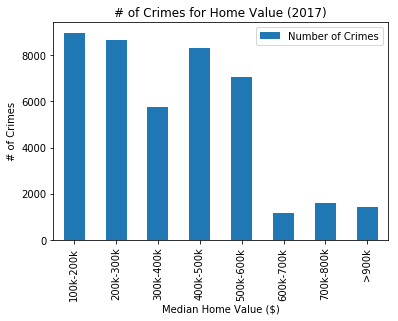

<Figure size 432x288 with 0 Axes>

In [14]:
bar_chart = df_graph_one.plot(kind="bar", title="# of Crimes for Home Value (2017)")
bar_chart.set_xlabel("Median Home Value ($)")
bar_chart.set_ylabel("# of Crimes")
fig = plt.figure()

In [15]:
census_pd.head()
census_pd.rename(columns={'Zipcode':'Zip Code'}, 
                 inplace=True)
census_pd['Zip Code'] = census_pd['Zip Code'].astype('int')

In [16]:
census_merged = pd.merge(new_df, census_pd, on=['Zip Code'])


In [17]:
census_merged = census_merged.drop_duplicates(subset=['Zip Code'], keep='first')
census_merged.head()

,Year,Zip Code,Number of Crimes,Crime Rate,ZHVI_AllHomes,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count
0,2017,78610,4,0.003686,237550.00,200k-300k,32692.0,34.4,76623.0,31766.0,2412.0
51,2017,78613,515,0.474576,272958.33,200k-300k,77779.0,35.1,96857.0,38378.0,2943.0
5010,2017,78617,1018,0.938093,171641.67,100k-200k,27900.0,29.6,52819.0,18598.0,4815.0
15360,2017,78641,1,0.000922,222066.67,200k-300k,60135.0,34.7,88562.0,35246.0,3892.0
15375,2017,78664,2,0.001843,199175.00,100k-200k,61361.0,33.0,67462.0,29552.0,6366.0


In [18]:
bin_two = [0, 19999, 29999, 39999, 49999, 59999, 69999, 799999]
group_labels_two = ["<20k", "20k-30k", "30k-40k", "40k-50k", "50k-60k",
                "60k-70k", "<700k"]
# df_graph_two.to_csv('not_sure.csv')
census_merged["Population Range"] = pd.cut(census_merged["Population"], bin_two, labels=group_labels_two)

In [19]:
# census_merged.to_csv('population.csv')
census_merged.head()

,Year,Zip Code,Number of Crimes,Crime Rate,ZHVI_AllHomes,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Population Range
0,2017,78610,4,0.003686,237550.00,200k-300k,32692.0,34.4,76623.0,31766.0,2412.0,30k-40k
51,2017,78613,515,0.474576,272958.33,200k-300k,77779.0,35.1,96857.0,38378.0,2943.0,<700k
5010,2017,78617,1018,0.938093,171641.67,100k-200k,27900.0,29.6,52819.0,18598.0,4815.0,20k-30k
15360,2017,78641,1,0.000922,222066.67,200k-300k,60135.0,34.7,88562.0,35246.0,3892.0,60k-70k
15375,2017,78664,2,0.001843,199175.00,100k-200k,61361.0,33.0,67462.0,29552.0,6366.0,60k-70k


In [20]:
cen_group = census_merged.groupby('Population Range')
number_crimes = cen_group["Number of Crimes"].sum()
df_graph_two = pd.DataFrame({"Number of Crimes":number_crimes
                                   })

df_graph_two.head()

,Number of Crimes
Population Range,
<20k,16650
20k-30k,21512
30k-40k,7594
40k-50k,28085
50k-60k,17622


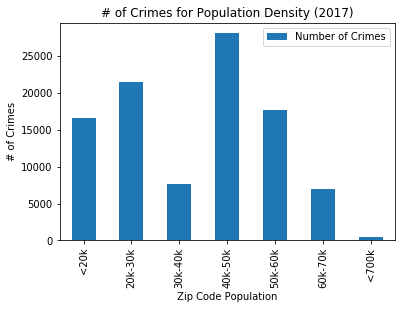

<Figure size 432x288 with 0 Axes>

In [24]:
bar_chart = df_graph_two.plot(kind="bar", title="# of Crimes for Population Density (2017)")
bar_chart.set_xlabel("Zip Code Population")
bar_chart.set_ylabel("# of Crimes")
fig = plt.figure()